In [1]:
import os
import zipfile

# Extract the archive
#zip_ref = zipfile.ZipFile('../../data/horse-or-human.zip', 'r')
#zip_ref.extractall('../../data/horse-or-human')
#
#zip_ref = zipfile.ZipFile('../../data/validation-horse-or-human.zip', 'r')
#zip_ref.extractall('../../data/validation-horse-or-human')
#
#zip_ref.close()

# Directory with training horse pictures
train_horse_dir = os.path.join('../../data/horse-or-human/horses')

# Directory with training human pictures
train_human_dir = os.path.join('../../data/horse-or-human/humans')

# Directory with training horse pictures
validation_horse_dir = os.path.join('../../data/validation-horse-or-human/horses')

# Directory with training human pictures
validation_human_dir = os.path.join('../../data/validation-horse-or-human/humans')

In [2]:
import tensorflow as tf

# Build the model
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 300x300 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fifth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('horses') and 1 for the other ('humans')
    tf.keras.layers.Dense(1, activation='sigmoid')
])

Metal device set to: Apple M1 Pro


2022-04-22 11:46:16.043306: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-04-22 11:46:16.043437: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [3]:
from tensorflow.keras.optimizers import RMSprop

# Set training parameters
model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(learning_rate=1e-4),
              metrics=['accuracy'])

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Apply data augmentation
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

validation_datagen = ImageDataGenerator(rescale=1/255)

# Flow training images in batches of 128 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        '../../data/horse-or-human/',  # This is the source directory for training images
        target_size=(300, 300),  # All images will be resized to 150x150
        batch_size=128,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

# Flow training images in batches of 128 using train_datagen generator
validation_generator = validation_datagen.flow_from_directory(
        '../../data/validation-horse-or-human/',  # This is the source directory for training images
        target_size=(300, 300),  # All images will be resized to 150x150
        batch_size=32,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')


Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.


In [5]:
# Constant for epochs
EPOCHS = 100

# Train the model
history = model.fit(
      train_generator,
      steps_per_epoch=8,  
      epochs=EPOCHS,
      verbose=1,
      validation_data = validation_generator,
      validation_steps=8)

Epoch 1/100


2022-04-22 11:46:18.318609: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-04-22 11:46:18.583522: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


8/8 [==============================] - ETA: 0s - loss: 0.6662 - accuracy: 0.5840

2022-04-22 11:46:33.235129: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


8/8 [==============================] - 16s 2s/step - loss: 0.6662 - accuracy: 0.5840 - val_loss: 0.6160 - val_accuracy: 0.8320
Epoch 2/100
8/8 [==============================] - 14s 2s/step - loss: 0.6219 - accuracy: 0.6874 - val_loss: 0.6419 - val_accuracy: 0.5000
Epoch 3/100
8/8 [==============================] - 13s 2s/step - loss: 0.6077 - accuracy: 0.6541 - val_loss: 0.6070 - val_accuracy: 0.5742
Epoch 4/100
8/8 [==============================] - 13s 2s/step - loss: 0.5719 - accuracy: 0.7186 - val_loss: 1.1558 - val_accuracy: 0.5000
Epoch 5/100
8/8 [==============================] - 13s 2s/step - loss: 0.5681 - accuracy: 0.7019 - val_loss: 0.6228 - val_accuracy: 0.5781
Epoch 6/100
8/8 [==============================] - 13s 2s/step - loss: 0.5697 - accuracy: 0.7275 - val_loss: 0.7750 - val_accuracy: 0.5195
Epoch 7/100
8/8 [==============================] - 13s 2s/step - loss: 0.5280 - accuracy: 0.7419 - val_loss: 0.5731 - val_accuracy: 0.6523
Epoch 8/100
8/8 [======================

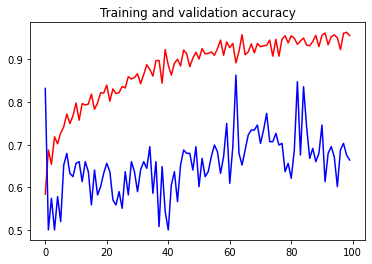

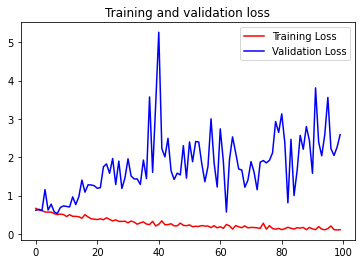

In [6]:
import matplotlib.pyplot as plt

# Plot the model results
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

 As you watch, you'll see the test accuracy climbing steadily. At first, the validation accuracy seems to be in step, but then you'll see it varying wildly. What's happening here is that despite the image augmentation, the diversity of images is still too sparse and the validation set may also be poorly designed, namely that the type of image in it is too close to the images in the training set. If you inspect the data for yourself you'll see that's the case. For example, the humans are almost always standing up and in the center of the picture, in both the training and validation sets, so augmenting the image will change it to look like something that doesn't look like what's in the validation set. So by the time the training has completed, we can see the same pattern. The training accuracy is trending towards 100 percent, but the validation is fluctuating in the 60s and 70s. Let's plot this, we can see that the training accuracy climbs steadily in the way that we would want, but the validation fluctuated like crazy. So what we can learn from this is that the image augmentation introduces a random element to the training images but if the validation set doesn't have the same randomness, then its results can fluctuate like this. So bear in mind that you don't just need a broad set of images for training, you also need them for testing or the image augmentation won't help you very much.